## Weather Prediction (Classification)
---

In [1]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Preprocessing
---

In [2]:
#load data
data = pd.read_csv("data/weather_data.csv")

# associate summary with int (label encoding)
def LABEL_ENCODING(col):
    label_encoder = preprocessing.LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    data[col].unique()
    return label_encoder

label_encoding = LABEL_ENCODING("Summary")

# drop columns

x = data.drop([
    "Summary", 
    "Formatted Date", 
    "Precip Type", 
    "Apparent Temperature (C)",
    "Loud Cover", 
    "Daily Summary"], 
    axis=1
)
y = data["Summary"]

# split in train/test (.80/.20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# save X_test as csv
filepath = "data/sensor_data.csv"
X_test.to_csv(filepath)

# feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train/Predict
---

In [3]:
# logistic regression
classifier = LogisticRegression(random_state=0, verbose=1)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/logistic_regression.sav'
pickle.dump((classifier, scaler, label_encoding), open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_log_reg}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          182     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51401D+05    |proj g|=  2.24282D+04

At iterate   50    f=  9.30119D+04    |proj g|=  1.44185D+02

At iterate  100    f=  9.16324D+04    |proj g|=  1.60271D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  182    100    107      1     0     0   1.603D+02   9.163D+04
  F =   91632.405604387706     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Accuracy score: 0.49007309107874136


/Users/marvinkronsbein/opt/miniconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s finished


In [4]:
# svm 
classifier = SVC(kernel="rbf", random_state=0, verbose=True)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/svm.sav'
pickle.dump((classifier, scaler, label_encoding), open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_svm}")

[LibSVM]*
optimization finished, #iter = 15
obj = -1.939882, rho = -1.062356
nSV = 5, nBSV = 1
*
optimization finished, #iter = 49
obj = -10.180005, rho = -0.374393
nSV = 21, nBSV = 9
*
optimization finished, #iter = 136
obj = -59.831373, rho = -0.003609
nSV = 76, nBSV = 57
*
optimization finished, #iter = 178
obj = -58.016394, rho = 0.022877
nSV = 76, nBSV = 52
*
optimization finished, #iter = 240
obj = -64.151283, rho = 0.018055
nSV = 80, nBSV = 58
*
optimization finished, #iter = 217
obj = -85.489266, rho = 0.766483
nSV = 104, nBSV = 81
*
optimization finished, #iter = 29
obj = -1.712375, rho = -0.951465
nSV = 14, nBSV = 1
*
optimization finished, #iter = 44
obj = -15.394586, rho = -0.448174
nSV = 30, nBSV = 20
*
optimization finished, #iter = 46
obj = -11.112454, rho = -0.545985
nSV = 28, nBSV = 13
*
optimization finished, #iter = 37
obj = -9.823092, rho = -0.718441
nSV = 23, nBSV = 12
*
optimization finished, #iter = 80
obj = -15.462370, rho = -0.527694
nSV = 31, nBSV = 16
*
optim

obj = -11.461660, rho = -0.653255
nSV = 25, nBSV = 13
*
optimization finished, #iter = 110
obj = -32.919955, rho = -0.474991
nSV = 57, nBSV = 44
*
optimization finished, #iter = 448
obj = -356.705945, rho = 0.094606
nSV = 467, nBSV = 443
*
optimization finished, #iter = 457
obj = -383.020864, rho = 0.282070
nSV = 500, nBSV = 481
*
optimization finished, #iter = 422
obj = -237.418289, rho = 0.057364
nSV = 340, nBSV = 319
*
optimization finished, #iter = 38
obj = -6.488804, rho = -0.573741
nSV = 19, nBSV = 8
*
optimization finished, #iter = 29
obj = -3.877136, rho = -0.709768
nSV = 17, nBSV = 4
*
optimization finished, #iter = 23
obj = -7.105370, rho = -0.938535
nSV = 12, nBSV = 6
*
optimization finished, #iter = 89
obj = -47.074847, rho = -1.040698
nSV = 61, nBSV = 49
*
optimization finished, #iter = 109
obj = -64.440481, rho = -0.590462
nSV = 79, nBSV = 67
*
optimization finished, #iter = 69
obj = -53.942892, rho = -0.724018
nSV = 80, nBSV = 73
*
optimization finished, #iter = 218
obj 

*
optimization finished, #iter = 56
obj = -43.974728, rho = 0.735729
nSV = 62, nBSV = 48
*
optimization finished, #iter = 505
obj = -51.996488, rho = 1.009399
nSV = 122, nBSV = 35
*
optimization finished, #iter = 28
obj = -2.227852, rho = -0.008427
nSV = 9, nBSV = 1
*
optimization finished, #iter = 22
obj = -1.434524, rho = -0.254055
nSV = 7, nBSV = 0
*
optimization finished, #iter = 22
obj = -1.901241, rho = -0.087380
nSV = 8, nBSV = 0
*
optimization finished, #iter = 41
obj = -4.796527, rho = 0.229483
nSV = 13, nBSV = 4
*
optimization finished, #iter = 32
obj = -5.187045, rho = 0.241881
nSV = 15, nBSV = 6
*
optimization finished, #iter = 23
obj = -5.866794, rho = 0.263656
nSV = 14, nBSV = 7
*.*
optimization finished, #iter = 106
obj = -25.939916, rho = 1.071227
nSV = 34, nBSV = 21
*
optimization finished, #iter = 37
obj = -3.829487, rho = 0.622183
nSV = 17, nBSV = 3
*
optimization finished, #iter = 29
obj = -3.673827, rho = 0.338263
nSV = 10, nBSV = 3
*.*
optimization finished, #iter

.................
*...*
optimization finished, #iter = 20473
obj = -21798.072380, rho = -0.505506
nSV = 22136, nBSV = 22006
.........................
*...*...
*
optimization finished, #iter = 31231
obj = -37739.516185, rho = 1.459722
nSV = 38080, nBSV = 37961
*
optimization finished, #iter = 82
obj = -17.581651, rho = -1.073376
nSV = 26, nBSV = 12
*
optimization finished, #iter = 30
obj = -7.493166, rho = -0.903728
nSV = 19, nBSV = 8
*
optimization finished, #iter = 32
obj = -5.964474, rho = -0.836201
nSV = 16, nBSV = 5
*
optimization finished, #iter = 137
obj = -27.668200, rho = -0.722219
nSV = 51, nBSV = 38
*
optimization finished, #iter = 148
obj = -29.788939, rho = -0.335485
nSV = 62, nBSV = 42
*
optimization finished, #iter = 76
obj = -29.376290, rho = -0.492322
nSV = 55, nBSV = 41
.............
*..*.*
optimization finished, #iter = 15281
obj = -17997.265888, rho = 1.902096
nSV = 18410, nBSV = 18313
*
optimization finished, #iter = 136
obj = -16.957912, rho = -1.083818
nSV = 24, n

In [5]:
# knn
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/knn.sav'
pickle.dump((classifier, scaler, label_encoding), open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_knn}")

Accuracy score: 0.4916282204136644


In [6]:
# bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# save the model
filename = 'models/naive_bayes.sav'
pickle.dump((classifier, scaler, label_encoding), open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_bayes = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_bayes}")

Accuracy score: 0.4707894873256959


In [7]:
# rf
classifier = RandomForestClassifier(n_estimators=40, random_state=0)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/random_forest.sav'
pickle.dump((classifier, scaler, label_encoding), open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_rf = classifier.score(X_test,y_test)
print(f"Accuracy score: {acc_rf}")

Accuracy score: 0.5844694417085687


### Visualize Model Accuracy
---

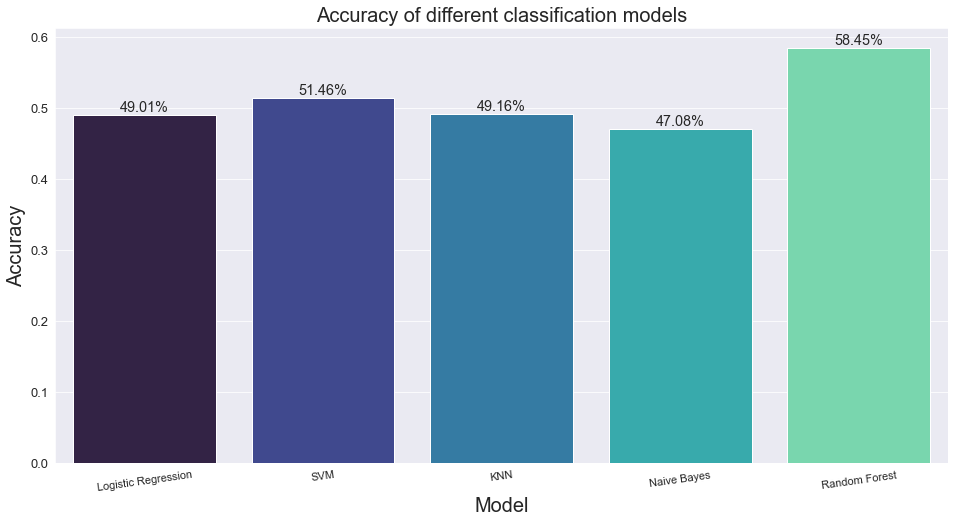

In [10]:
accuracy_scores=[
    acc_log_reg
    ,acc_svm
    ,acc_knn
    ,acc_bayes
    ,acc_rf
]

labels=[
    "Logistic Regression"
    ,"SVM"
    ,"KNN"
    ,"Naive Bayes"
    ,"Random Forest"
]

# plot params / plotting
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x=labels, y=accuracy_scores, palette = "mako", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different classification models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize = 'x-large')
filepath = "report/model_comparison.pdf"
plt.savefig(filepath)
plt.show()